# 1. Simple Image Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Loading Images](#loading)
3. [Resizing Images](#resize)
4. [Negative Images](#negative)
5. [Logarithmic Transformation](#log)
6. [Image Binarizer](#bin)
7. [Image Quantizer](#quant)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Loading Images <a class="anchor" id="loading"></a>

<class 'numpy.ndarray'>


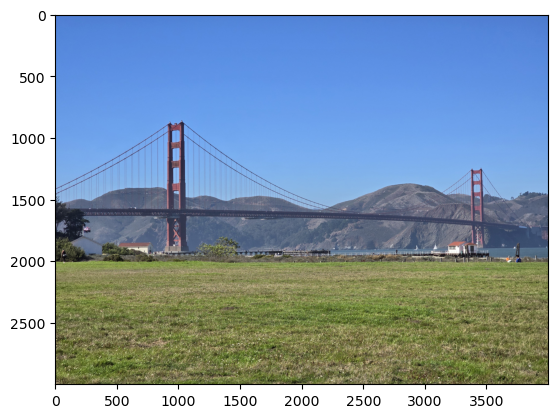

In [3]:
img1 = mpimg.imread('data/image.jpg')
plt.imshow(img1)
print(type(img1))

Look at the shape of this array:

In [4]:
img1.shape

(3000, 4000, 3)

The image is actually composed of three "layers, or *channels*, for red, green, and blue (RGB) pixel intensities.

Display the same image but this time we'll use another popular Python library for working with images - **cv2**.

numpy.ndarray

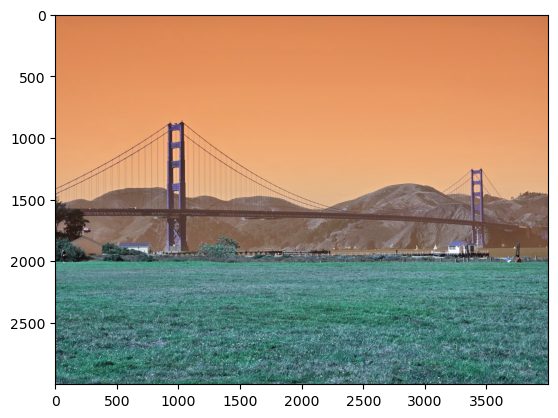

In [5]:
img2 = cv2.imread('data/image.jpg')
plt.imshow(img2)
type(img2)

The trouble is that cv2 loads the array of image data with the channels ordered as blue, green, red (BGR) instead of red, green blue (RGB).

Let's fix that

AxesImage(shape=(3000, 4000, 3))


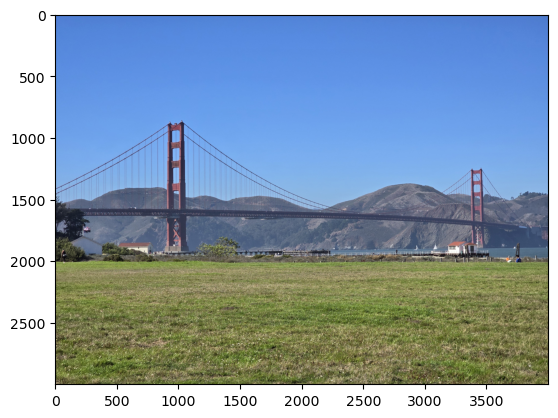

In [6]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(plt.imshow(img2))

Lastly, one more commonly used library for image processing in Python we should consider - **PIL**:

<class 'PIL.JpegImagePlugin.JpegImageFile'>


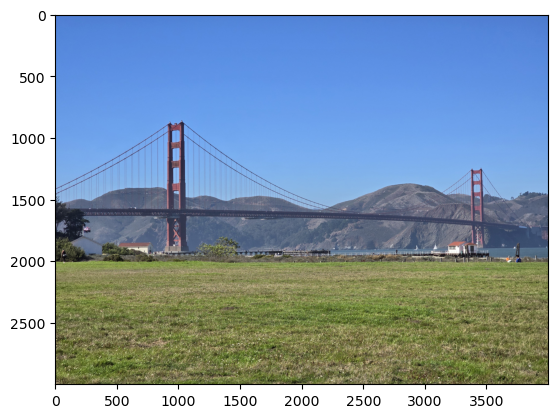

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

img3 = Image.open('data/image.jpg')
plt.imshow(img3)
print(type(img3))

It's easy to convert a PIL JpegImageFile to a numpy array

In [9]:
img3 = np.array(img3)
img3.shape

(3000, 4000, 3)

Saving a numpy array in an optimized format, should you need to persist images into storage

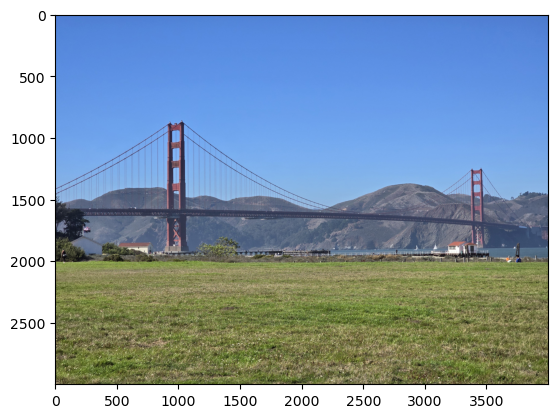

In [10]:
# Save the image
np.save('data/img.npy', img3)

# Load the image
img3 = np.load('data/img.npy')

plt.imshow(img3)

## Resizing an Image <a class="anchor" id="resize"></a>
One of the most common manipulations of an image is to resize it.

Generally, we want to ensure that all of your training images have consistent dimensions.

Original size: 4000 x 3000
New size: 200 x 200


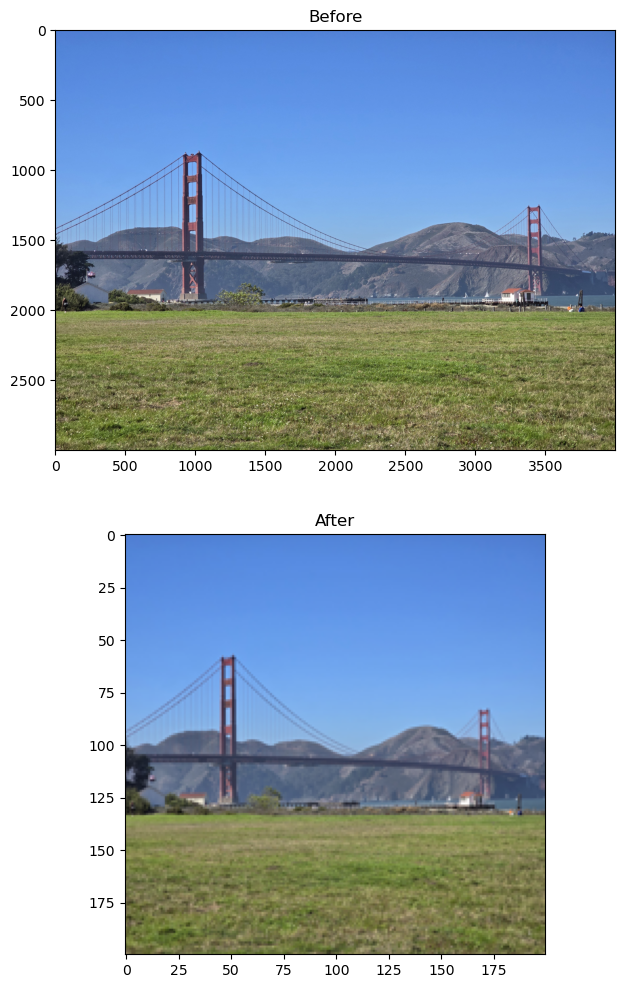

In [11]:
from PIL import Image, ImageOps

# Load the image array into a PIL Image
orig_img = Image.fromarray(img3)

# Get the image size
o_h, o_w = orig_img.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 200 x 200
target_size = (200,200)
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(new_img)
a.set_title('After')

plt.show()


If we want to resize the image and change its shape without distorting it, we'll need to *scale* the image so that its largest dimension fits our new desired size.

Original size: 4000 x 3000
Scaled size: 200 x 150
New size: 200 x 200


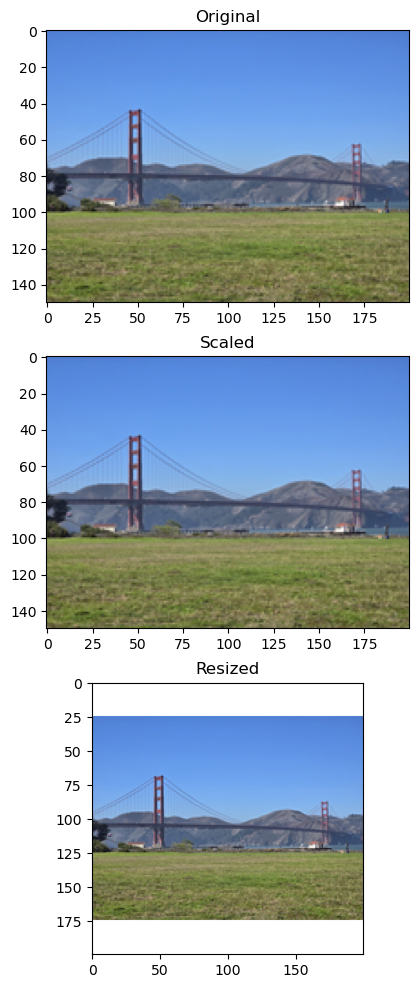

In [12]:
# Get the image size
orig_height, orig_width = orig_img.size
print('Original size:', orig_height, 'x', orig_width)

# We'll resize this so it's 200 x 200
target_size = (200,200)

# Scale the image to the new size using the thumbnail method
scaled_img = orig_img
scaled_img.thumbnail(target_size, Image.Resampling.LANCZOS)
scaled_height, scaled_width = scaled_img.size
print('Scaled size:', scaled_height, 'x', scaled_width)

# Create a new white image of the target size to be the background
new_img = Image.new("RGB", target_size, (255, 255, 255))

# paste the scaled image into the center of the white background image
new_img.paste(scaled_img, (int((target_size[0] - scaled_img.size[0]) / 2), int((target_size[1] - scaled_img.size[1]) / 2)))
new_height, new_width = new_img.size
print('New size:', new_height, 'x', new_width)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

# Subplot for scaled image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(scaled_img)
a.set_title('Scaled')

# Subplot for resized image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(new_img)
a.set_title('Resized')

plt.show()

## Negative Images <a class="anchor" id="negative"></a>

In [13]:
orig_img = cv2.imread('data/image.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
img_neg = 255 - orig_img

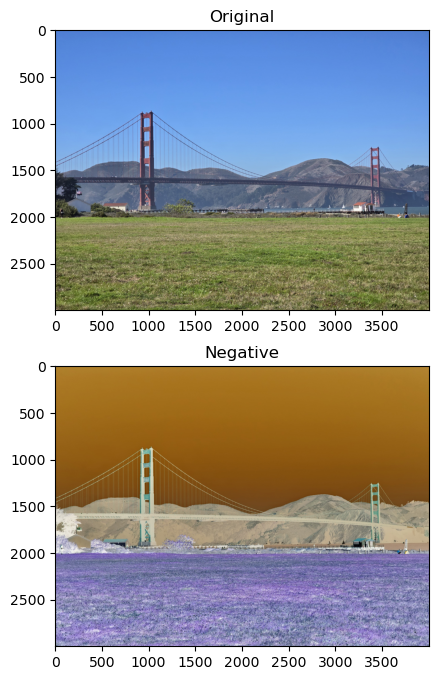

In [14]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img_neg)
a.set_title('Negative')

plt.show()

## Logarithmic Transformation <a class="anchor" id="log"></a>

$$
S = c * log (1 + r)
$$

where,
- $R$ = input pixel value
- $C$ = scaling constant and
- $S$ = output pixel value

The value of $c$ is chosen such that we get the maximum output value corresponding to the bit size used. So, the formula for calculating $c$  is as follows:

$c = 255 / (log (1 + $ max input pixel value $))$

In [16]:
orig_img = cv2.imread('data/image.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Apply log transformation method
c = 255 / np.log(1 + np.max(orig_img))
log_img = c * (np.log(orig_img + 1))

# Specify the data type so that
# float value will be converted to int
log_img = np.array(log_img, dtype = np.uint8)

/var/folders/9j/6sr11fgn3hd8nhx51n3lthvh0000gn/T/ipykernel_48509/418958946.py:6: RuntimeWarning: divide by zero encountered in log
  log_img = c * (np.log(orig_img + 1))
/var/folders/9j/6sr11fgn3hd8nhx51n3lthvh0000gn/T/ipykernel_48509/418958946.py:10: RuntimeWarning: invalid value encountered in cast
  log_img = np.array(log_img, dtype = np.uint8)


Log transformation of gives actual information by enhancing the image. If we apply this method in an image having higher pixel values then it will enhance the image more and actual information of the image will be lost.

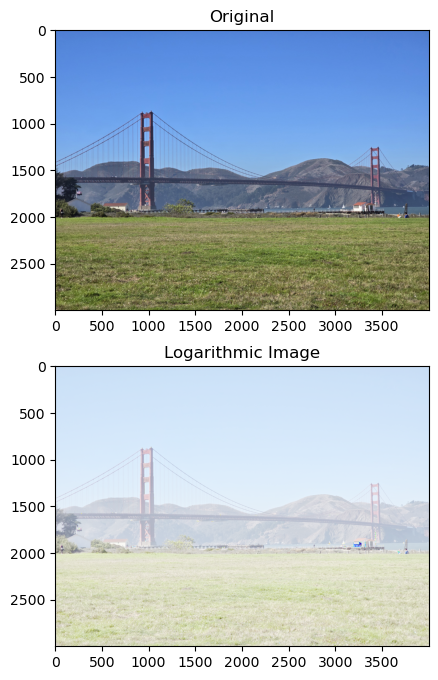

In [17]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(log_img)
a.set_title('Logarithmic Image')

plt.show()

## Image Binarizer (Thresholding) <a class="anchor" id="bin"></a>

Binarize pixels (set pixel values to 0 or 1) according to a threshold.

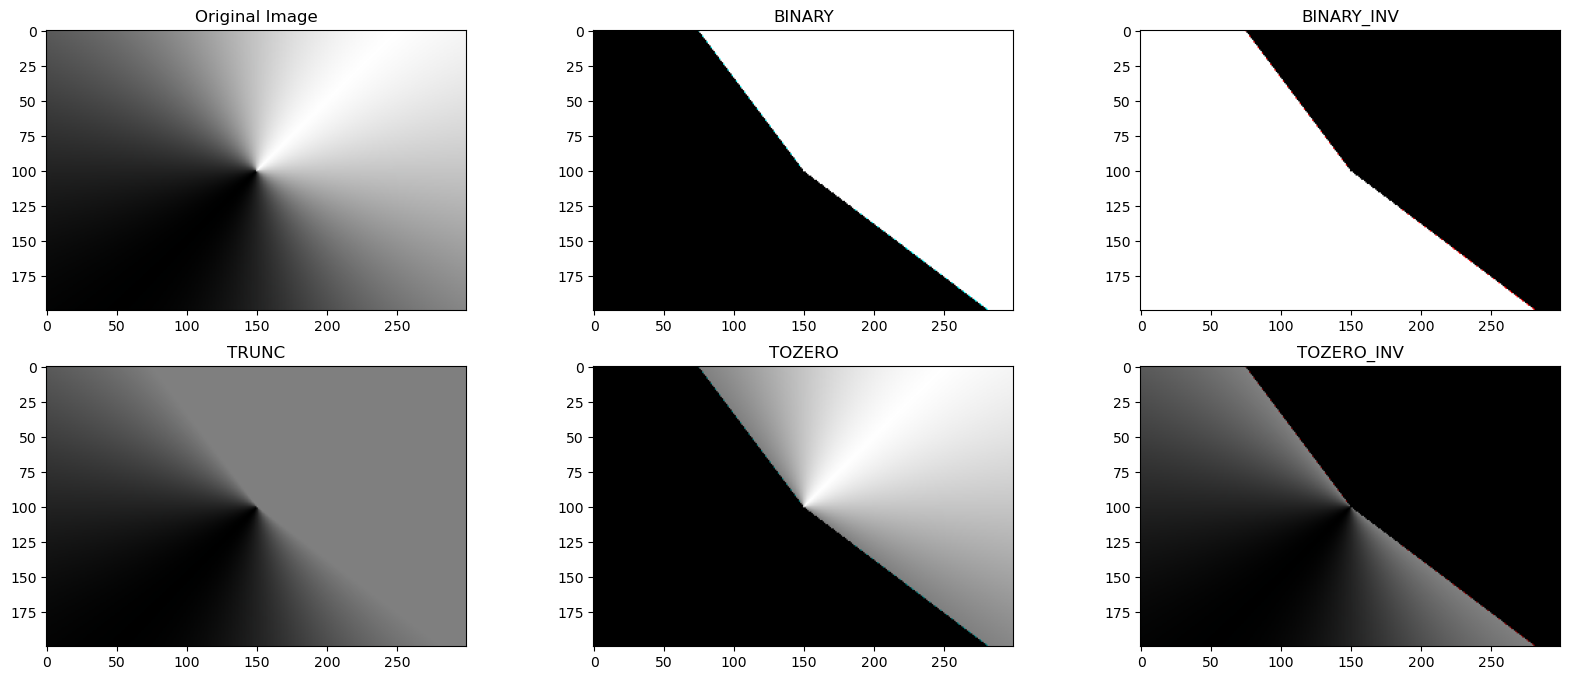

In [18]:
orig_img = cv2.imread('data/linear_gradient.png')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

ret,thresh1 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(orig_img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [orig_img, thresh1, thresh2, thresh3, thresh4, thresh5]
n = np.arange(6)

fig = plt.figure(figsize=(20, 8))
for i in n:
  plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')
  plt.title(titles[i])

plt.show()

## Image Quantizer  <a class="anchor" id="quant"></a>

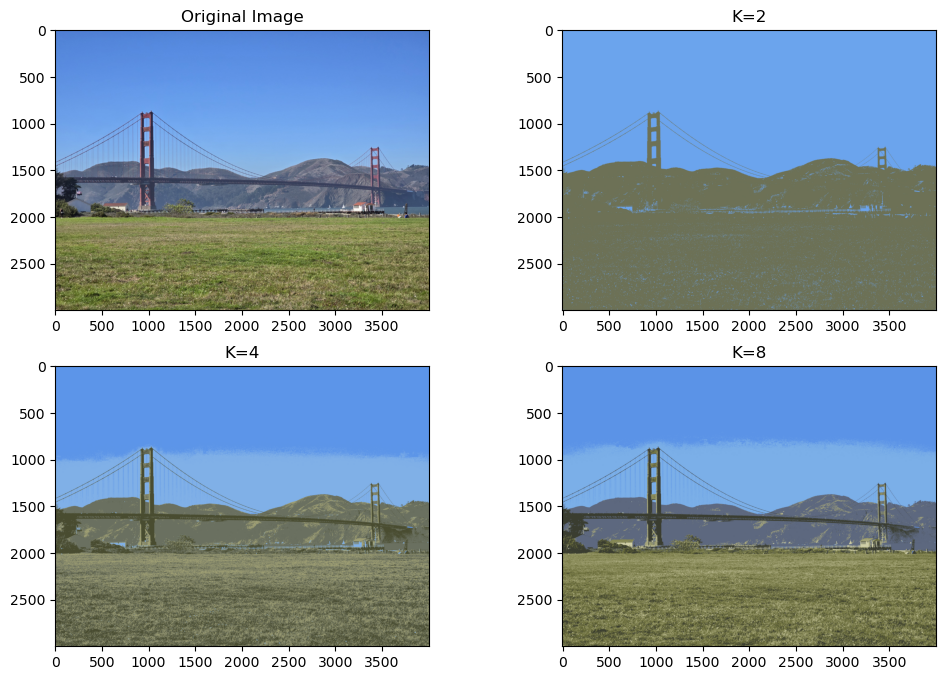

In [19]:
orig_img = cv2.imread('data/image.jpg')

Z = orig_img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
def colorQuant(Z, K, criteria):

   ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

   # Now convert back into uint8, and make original image
   center = np.uint8(center)
   res = center[label.flatten()]
   res2 = res.reshape((orig_img.shape))
   return res2
res1 = colorQuant(Z, 2, criteria)
res2 = colorQuant(Z, 5, criteria)
res3 = colorQuant(Z, 8, criteria)

fig = plt.figure(figsize=(12, 8))

plt.subplot(221),plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(222),plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))
plt.title('K=2')

plt.subplot(223),plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title('K=4')

plt.subplot(224),plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB))
plt.title('K=8')

plt.show()

## Pixel-by-pixel transformations  <a class="anchor" id="quant"></a>

In [20]:
def mostrar_imagen_cv2(img_bgr, titulo="Imagen"):
    """
    Muestra una imagen de OpenCV (BGR) en Jupyter Notebook usando matplotlib (RGB).
    """
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

## Exercise 1) Three photometric transformations <a class="anchor" id="quant"></a>

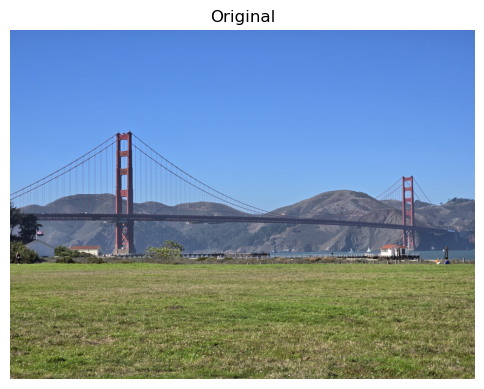

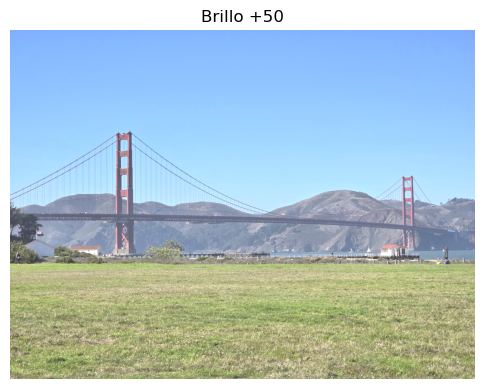

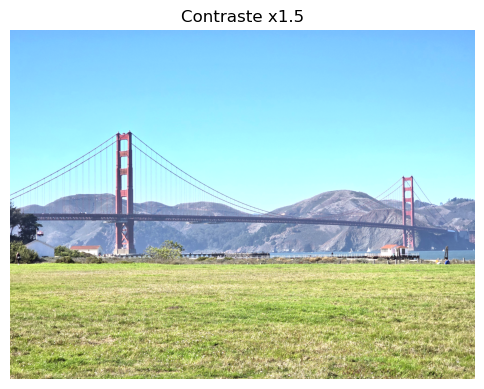

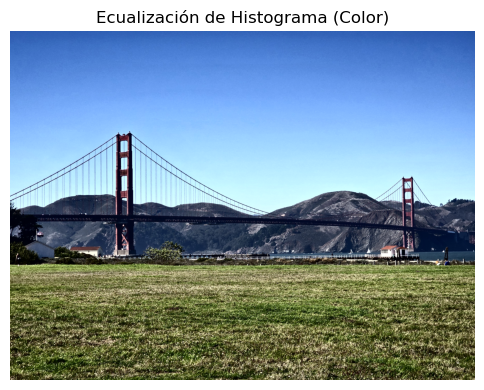

In [21]:
def ajustar_brillo(imagen, brillo_val=50):
    """
    Suma un valor (brillo_val) a todos los píxeles (canales B, G, R).
    """
    # cv2.add maneja la saturación automática en el rango [0..255]
    return cv2.add(imagen, (brillo_val, brillo_val, brillo_val, 0))

def ajustar_contraste(imagen, factor=1.5):
    """
    Multiplica los valores de cada píxel por un factor para ajustar contraste.
    """
    # Convertimos a float para permitir multiplicar sin truncar antes de tiempo
    imagen_float = imagen.astype(np.float32)
    imagen_contraste = (factor * imagen_float).clip(0, 255).astype(np.uint8)
    return imagen_contraste

def ecualizar_histograma_color(imagen):
    """
    Ecualiza el histograma de una imagen **en color**:
    - Convierte a espacio de color YCrCb.
    - Ecualiza solo el canal Y (luminancia).
    - Convierte de nuevo a BGR.
    """
    ycrcb = cv2.cvtColor(imagen, cv2.COLOR_BGR2YCrCb)
    ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])  # ecualizar canal Y
    return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

img_path = 'data/image.jpg'
img = cv2.imread(img_path)

# 1. Ajuste de brillo
img_brillo = ajustar_brillo(img, brillo_val=50)

# 2. Ajuste de contraste
img_contraste = ajustar_contraste(img, factor=1.5)

# 3. Ecualización de histograma
img_ecualizada = ecualizar_histograma_color(img)

# Mostrar resultados
mostrar_imagen_cv2(img, "Original")
mostrar_imagen_cv2(img_brillo, "Brillo +50")
mostrar_imagen_cv2(img_contraste, "Contraste x1.5")
mostrar_imagen_cv2(img_ecualizada, "Ecualización de Histograma (Color)")

Below are three photometric transformations from exercise 1. Each transformation includes a brief description and a justification for why it is useful in image processing.

1. Brightness Adjustment

Description
Brightness adjustment involves adding (or subtracting) a constant value to every pixel in the image. Adding a positive value makes the image brighter, while subtracting it makes the image darker.

Justification
	•	Quick correction: Helps compensate underexposed or overexposed photos with minimal effort.
	•	Visibility: Enhances dark or bright areas without changing the overall structure of the scene.
	•	Data augmentation: In AI training, varying brightness enriches the dataset by providing different lighting conditions.

2. Contrast Adjustment

Description
Contrast adjustment typically multiplies the pixel intensity values by a certain factor. This widens or compresses the range of intensities. As a result, bright areas become brighter and dark areas become darker (or vice versa, depending on the factor and offsets).

Justification
	•	Detail differentiation: Higher contrast can reveal contours and textures that were previously subtle.
	•	Image enhancement: Particularly useful for “flat” images that need improved depth and dynamism.
	•	Fine control: Adjusting both the multiplication factor and offsets provides more nuanced control than a simple brightness change.

3. Histogram Equalization (Color)

Description
Histogram equalization redistributes pixel intensities to better utilize the full available range (0 to 255 for 8-bit images). For color images, it is usually applied to the luminance channel (for example, Y in YCrCb), preserving more natural colors in the process.

Justification
	•	Global contrast increase: Particularly effective for images with uneven lighting or limited tonal range.
	•	Highlights dark regions: Uncovers details in shadows by “stretching” the tonal distribution.
	•	Widely used technique: Applied in photography, medical imaging, and satellite image analysis to emphasize key features.

## Exercise 2) Negative Image <a class="anchor" id="quant"></a>

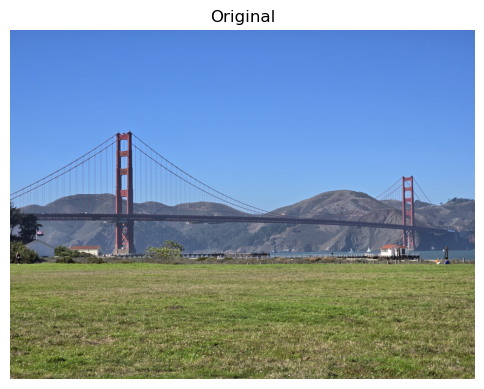

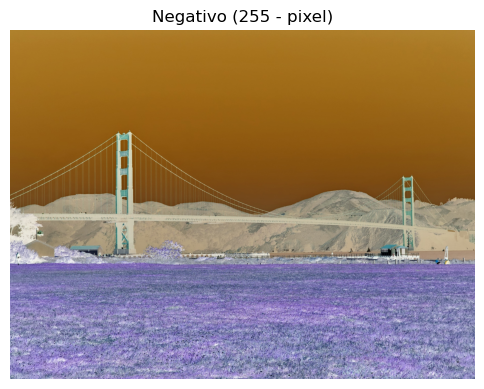

In [22]:
img = cv2.imread(img_path)

negativo = 255 - img

mostrar_imagen_cv2(img, "Original")
mostrar_imagen_cv2(negativo, "Negativo (255 - pixel)")

Description

An image negative inverts the intensity values of each pixel (for example, 255 - pixel in 8-bit images). The same operation applies to each channel in color images.

Justification

	•	Traditional photography: It was the foundation of photographic film rolls.
	•	Highlighting details: In fields such as radiology, inverting values can make subtle details more visible.
	•	Variation in AI: Storing negative images is another way to generate augmented data in computer vision applications.

## Exercise 3) Gamma Correction <a class="anchor" id="quant"></a>

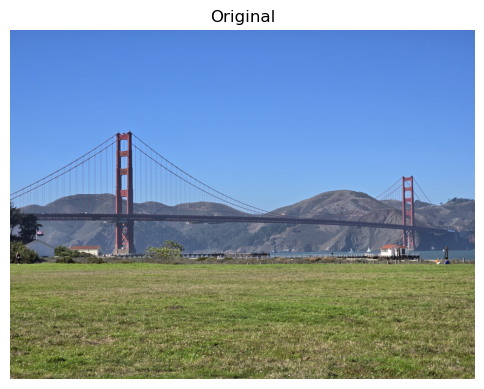

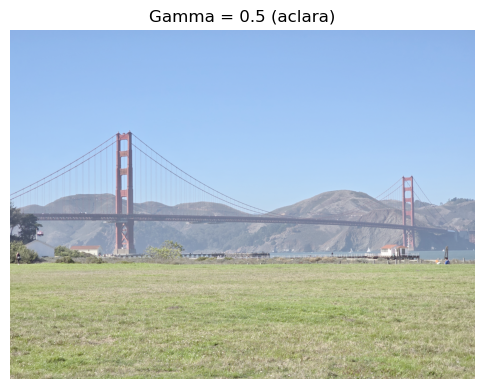

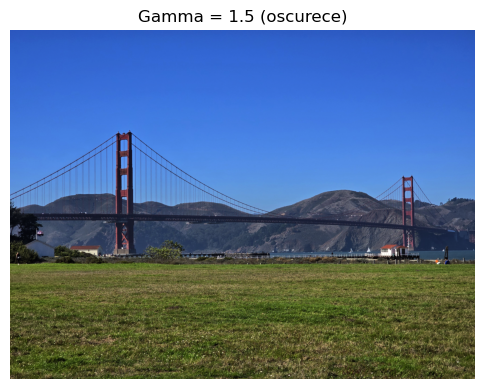

In [ ]:
def correccion_gamma(imagen, gamma=1.0):

    tabla = np.array([((i / 255.0) ** gamma) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(imagen, tabla)

img_path = 'data/image.jpg'
img = cv2.imread(img_path)

# Gamma para aclarar
img_gamma_clara = correccion_gamma(img, gamma=0.5)
# Gamma para oscurecer
img_gamma_oscura = correccion_gamma(img, gamma=1.5)

mostrar_imagen_cv2(img, "Original")
mostrar_imagen_cv2(img_gamma_clara, "Gamma = 0.5 (aclara)")
mostrar_imagen_cv2(img_gamma_oscura, "Gamma = 1.5 (oscurece)")

Description

Gamma correction is commonly described by the equation (I/255)^\gamma \times 255. When \gamma < 1, dark areas are emphasized (the image is brightened). When \gamma > 1, the image is darkened, compressing the brighter regions.

Justification
	•	Screen and sensor compensation: Monitors and cameras apply gamma corrections to adjust the nonlinear response of light and improve image appearance.
	•	Detail enhancement: Prevents losing information in very dark or very bright areas of the image.
	•	Luminosity control: Offers a more precise adjustment than a simple global change in brightness or contrast.

## Image subtraction <a class="anchor" id="quant"></a>

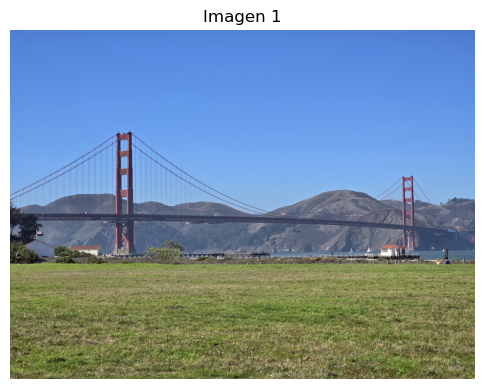

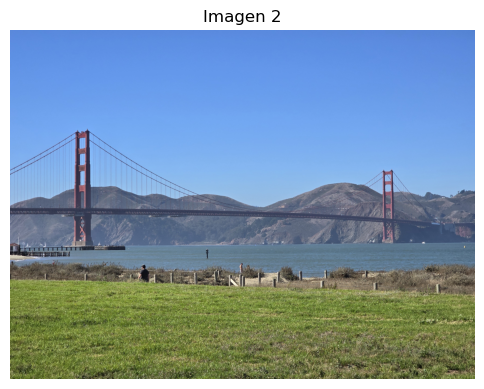

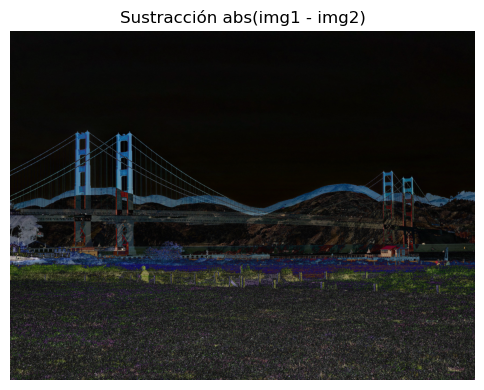

In [ ]:
img1_path = 'data/image.jpg'     # Imagen 1
img2_path = 'data/image2.jpg'    # Imagen 2 (debe existir y ser similar/diferente)

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

sustraccion = cv2.absdiff(img1, img2)

mostrar_imagen_cv2(img1, "Imagen 1")
mostrar_imagen_cv2(img2, "Imagen 2")
mostrar_imagen_cv2(sustraccion, "Sustracción abs(img1 - img2)")

Description

Image subtraction (often \(\lvert I_1 - I_2\rvert\)) detects differences between two similar shots. By subtracting pixel by pixel, any significant change between the two images becomes highlighted in the result.

Justification

	•	Movement or change detection: In computer vision, it is used to find added or removed elements between consecutive frames.
	•	Astronomy: Makes it possible to highlight variations in sky photographs (e.g., new stars or supernovas).
	•	Version comparison: Reveals differences between two apparently identical images, which is useful in testing or visual validation workflows.

**Resources**

Gonzalez, R. C., & Woods, R. E. (2018). _Digital Image Processing_ (4th ed.). Pearson.

Pratt, W. K. (2007). _Digital Image Processing: PIKS Scientific Inside_ (4th ed.). Wiley-Interscience.

Bradski, G., & Kaehler, A. (2008). _Learning OpenCV: Computer Vision with the OpenCV Library_. O’Reilly Media.

OpenCV. (n.d.). _OpenCV Documentation_. [https://docs.opencv.org](https://docs.opencv.org)

The Pillow Project. (n.d.). _Pillow Documentation_. [https://pillow.readthedocs.io](https://pillow.readthedocs.io)